In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from env import get_connection


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import acquire
import prepare

#### Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

In [2]:
# acquire data
titanic_original = acquire.get_titanic_data()

# peek into data
titanic_original.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
# clean data
titanic_clean = prepare.prep_titanic(titanic_original)

# peek into data
titanic_clean.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [4]:
# peek into data
titanic_clean.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [5]:
#check to see if columns data types are float or int
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   fare                     891 non-null    float64
 5   alone                    891 non-null    int64  
 6   sex_male                 891 non-null    uint8  
 7   embark_town_Queenstown   891 non-null    uint8  
 8   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 44.5 KB


In [6]:
# split data using funciton form prepare module 
train, val, test = prepare.train_validate_test_split(titanic_clean, 'survived')

# get shape of train, validate and test data
train.shape, val.shape, test.shape

((498, 9), (214, 9), (179, 9))

In [7]:
# create labels 
X_train = train.drop(columns = ['survived'])
y_train = train['survived']

X_val =val.drop(columns = ['survived'])
y_val = val['survived']

X_test = test.drop(columns = ['survived'])
y_test = test['survived']

In [8]:
# to find baseling, find most common classes
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [9]:
# assign most common class to baseline prediction
baseline_prediction = 0

In [10]:
# compare baseline with y_train class to get most common class and get mean
baseline_accuracy = (y_train==baseline_prediction).mean()
baseline_accuracy

0.6164658634538153

In [11]:
# alternate way to get baseline accuracy
baseline_prediction = y_train.mode()
match_baseline = (y_train==0)
baseline_accuracy = match_baseline.mean()
baseline_accuracy

0.6164658634538153

In [12]:
# create decision tree
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state= 42)

In [13]:
# fit the model to training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
# accuracy score on train
clf.score(X_train, y_train)

0.8112449799196787

In [15]:
# accuracy score on val
clf.score(X_val, y_val)

0.8271028037383178

In [16]:
# train predictions 
train_preds = clf.predict(X_train)

In [17]:
# validate predictions
val_preds = clf.predict(X_val)

In [18]:
# class_names = np.array(clf.classes_).astype('str').tolist()

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.383\nsamples = 178\nvalue = [46, 132]\nclass = 1'),
 Text(0.125, 0.375, 'fare <= 28.856\ngini = 0.104\nsamples = 91\nvalue = [5, 86]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.245\nsamples = 35\nvalue = [5, 30]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]\nclass = 1'),
 Text(0.375, 0.375, 'embark_town_Southampton <= 0.5\ngini = 0.498\nsamples = 87\nvalue = [41, 46]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.401\nsamples = 36\nvalue = [10, 26]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.477\nsamples = 51\nvalue = [31, 20]\nclass = 0'),
 Text(0.75, 0.625, 'pclass <= 1.5\ngini = 0.301\nsamples = 320\nvalue = [261, 59]\nclass = 0'),
 Text(0.625, 0.375, 'fare <= 26.144\ngini = 0.476\nsamples = 64\nvalue = [39, 25]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = 0'),
 Text(0.687

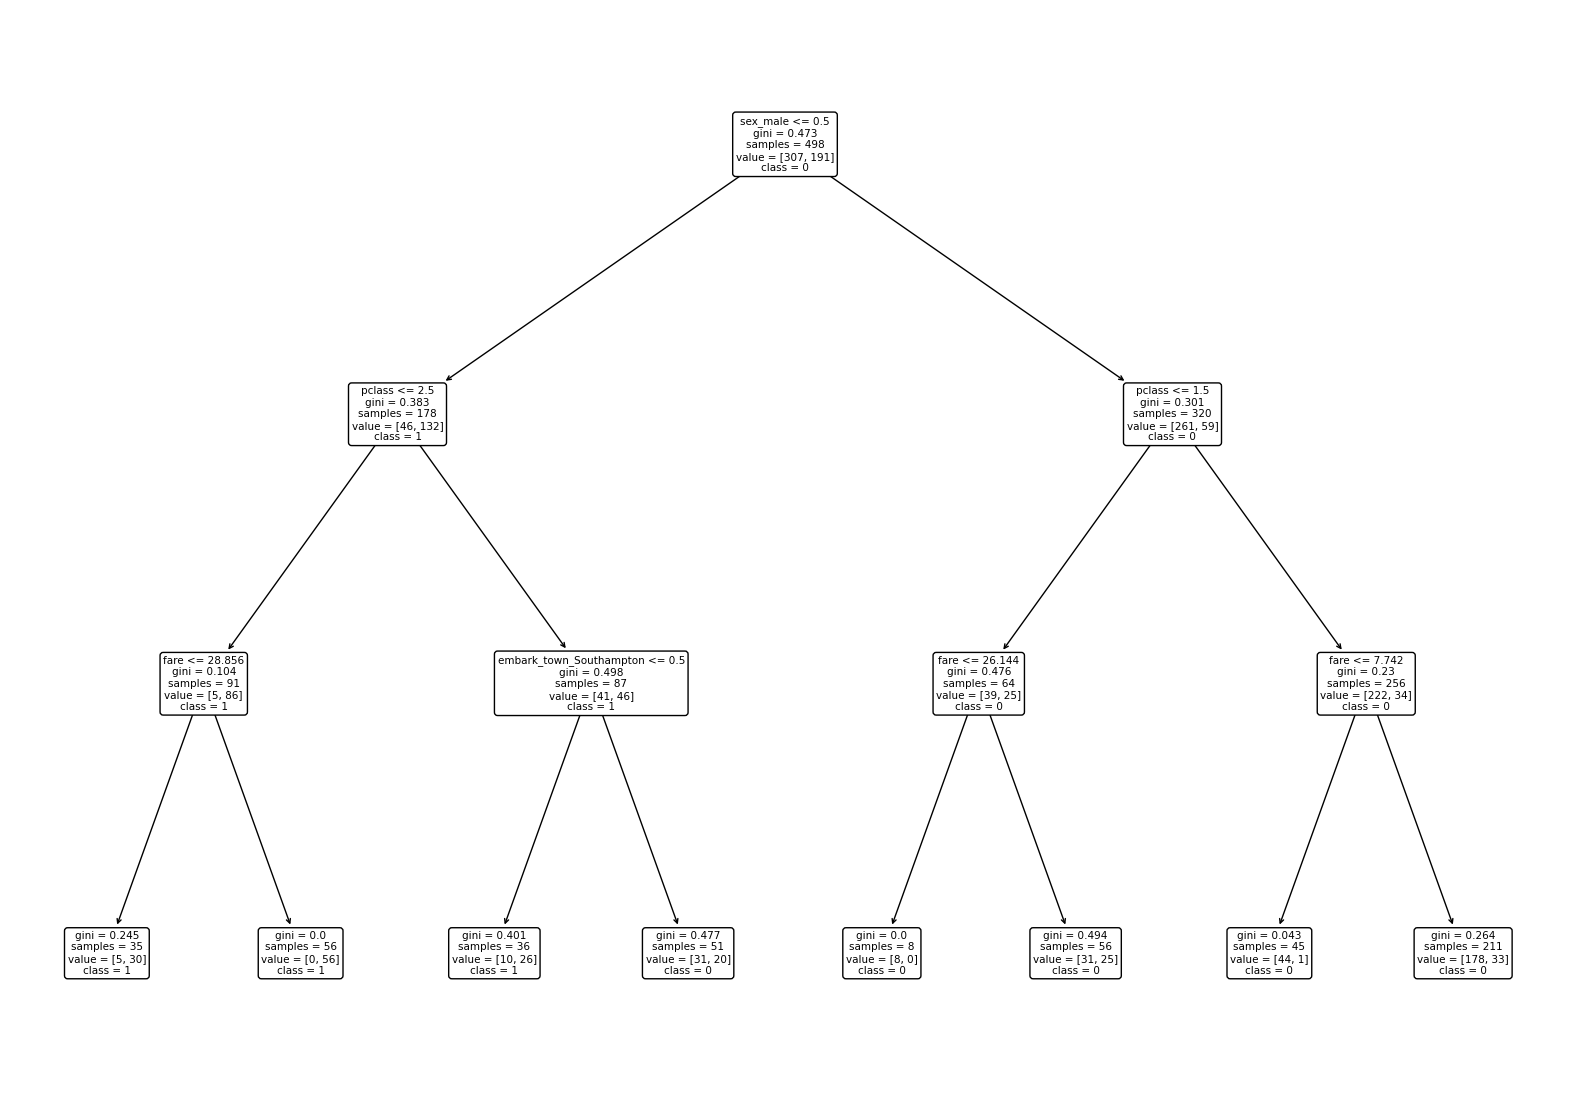

In [19]:
# visualize a decision tree
plt.figure(figsize=(20,14))

plot_tree(clf, feature_names = X_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded=True)

In [20]:
# make prediction on train observations
val_preds = clf.predict(X_val)

In [21]:
# confusion matrix
confusion_matrix(y_val ,val_preds)

array([[127,   5],
       [ 32,  50]])

In [22]:
# classification report on val
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       132
           1       0.91      0.61      0.73        82

    accuracy                           0.83       214
   macro avg       0.85      0.79      0.80       214
weighted avg       0.84      0.83      0.82       214



In [23]:
# calculate truenegative, falsepositive, falsenegative,truepositive 
TN, FP, FN, TP = confusion_matrix(y_train, train_preds).ravel()
TN, FP, FN, TP

(292, 15, 79, 112)

In [24]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
acc

0.8112449799196787

In [25]:
# true positive rate or precision
precision = TPR = TP / (TP + FP)
precision

0.8818897637795275

In [26]:
# false positive rate
FPR = FP / (FP + TN)
FPR 

0.048859934853420196

In [27]:
# true neagative rate
TNR = TN / (TN + FP)
TNR 

0.9511400651465798

In [28]:
# false negative rate
FNR = FN / (FN + TP)

In [29]:
# recall
recall = TP / (TP + FN)
recall

0.5863874345549738

In [30]:
# f1-score
f1_score = 2 * (precision*recall) / (precision+recall)
f1_score

0.7044025157232704

In [31]:
# support
support_pos = TP + FN
support_neg = FP + TN
support_pos, support_neg

(191, 307)

#### 5. Run through steps 2-4 using a different max_depth value.

In [32]:
# create decision tree with max_depth=4

seed = 42

clf2 = DecisionTreeClassifier(max_depth=4, random_state= 42)

In [33]:
# fit the model to training data
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [34]:
# accuracy score on train
clf2.score(X_train, y_train)

0.8253012048192772

In [35]:
# accuracy score on val
clf2.score(X_val, y_val)

0.8271028037383178

In [36]:
# train predictions 
train_preds = clf2.predict(X_train)

In [37]:
# validate predictions
val_preds = clf2.predict(X_val)

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.383\nsamples = 178\nvalue = [46, 132]\nclass = 1'),
 Text(0.125, 0.375, 'fare <= 28.856\ngini = 0.104\nsamples = 91\nvalue = [5, 86]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.245\nsamples = 35\nvalue = [5, 30]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]\nclass = 1'),
 Text(0.375, 0.375, 'embark_town_Southampton <= 0.5\ngini = 0.498\nsamples = 87\nvalue = [41, 46]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.401\nsamples = 36\nvalue = [10, 26]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.477\nsamples = 51\nvalue = [31, 20]\nclass = 0'),
 Text(0.75, 0.625, 'pclass <= 1.5\ngini = 0.301\nsamples = 320\nvalue = [261, 59]\nclass = 0'),
 Text(0.625, 0.375, 'fare <= 26.144\ngini = 0.476\nsamples = 64\nvalue = [39, 25]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = 0'),
 Text(0.687

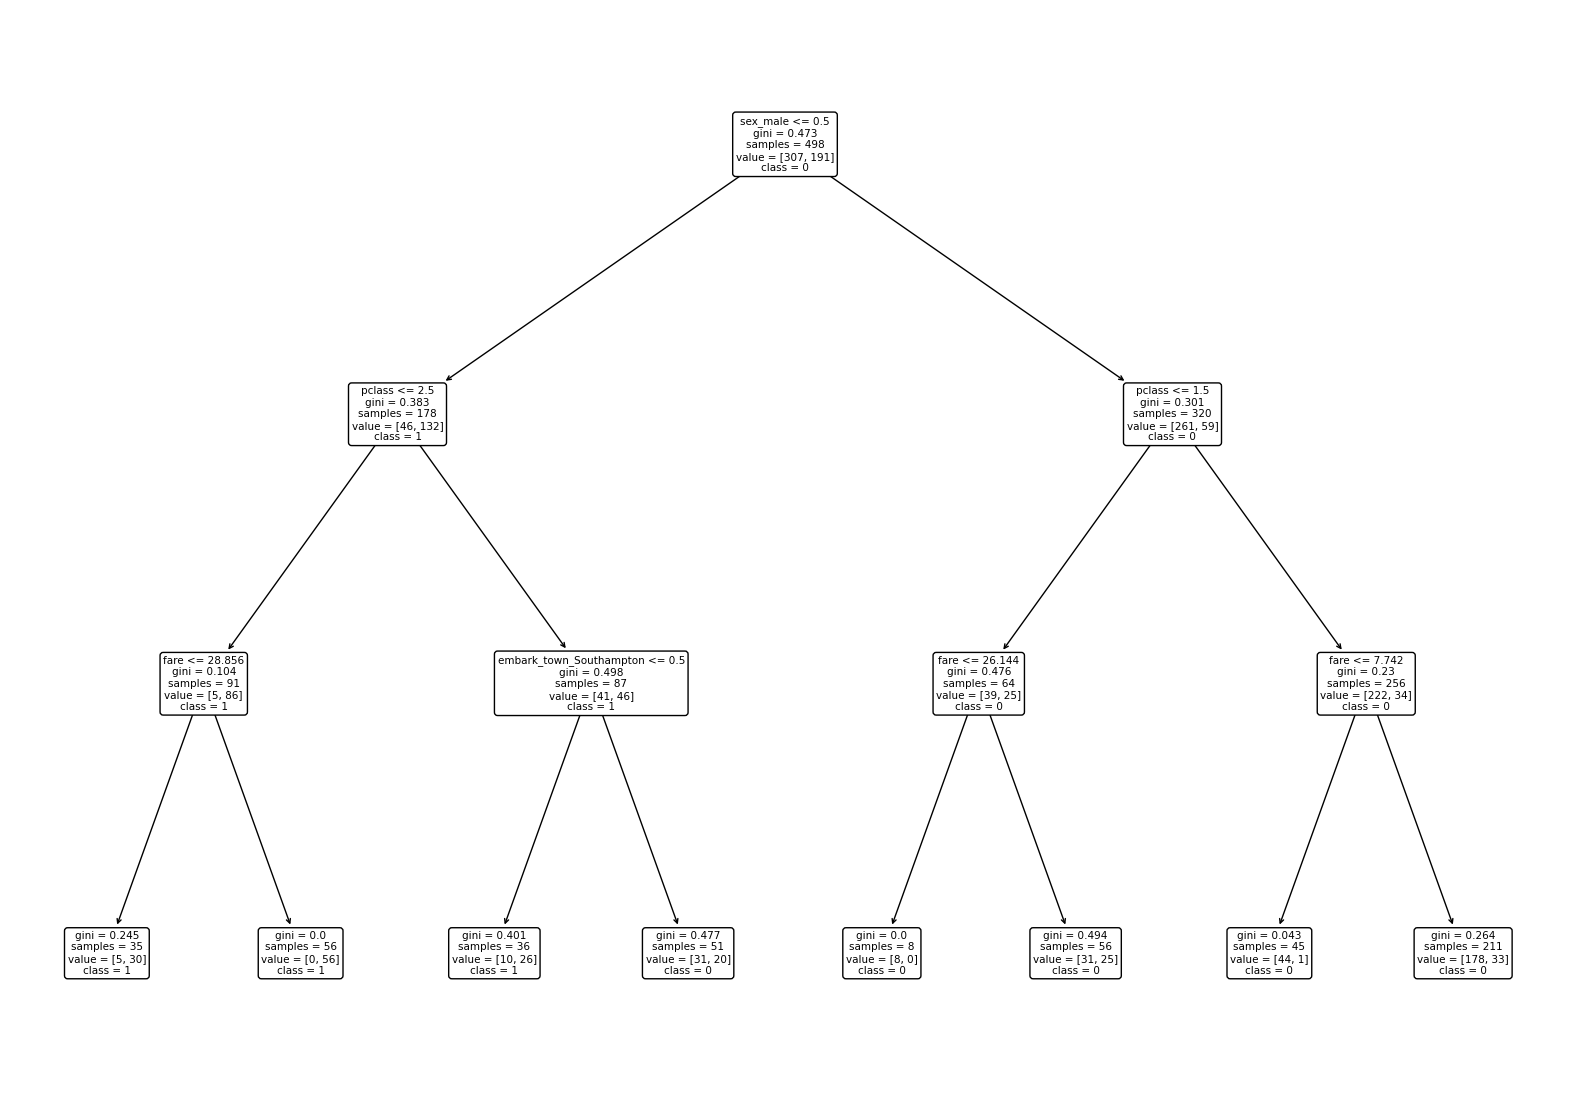

In [38]:
# visualize a decision tree
plt.figure(figsize=(20,14))

plot_tree(clf, feature_names = X_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded=True)

In [39]:
# make prediction on train observations
val_preds_2 = clf2.predict(X_val)

In [40]:
# confusion matrix of model2
confusion_matrix(y_val ,val_preds_2)

array([[123,   9],
       [ 28,  54]])

In [41]:
# classification report of model 2
print(classification_report(y_val, val_preds_2))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       132
           1       0.86      0.66      0.74        82

    accuracy                           0.83       214
   macro avg       0.84      0.80      0.81       214
weighted avg       0.83      0.83      0.82       214



In [42]:
# calculate truenegative, falsepositive, falsenegative,truepositive 
TN, FP, FN, TP = confusion_matrix(y_train, train_preds).ravel()
TN, FP, FN, TP

(287, 20, 67, 124)

In [43]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
acc

0.8253012048192772

In [44]:
# true positive rate or precision
precision = TPR = TP / (TP + FP)
precision

0.8611111111111112

In [45]:
# false positive rate
FPR = FP / (FP + TN)
FPR 

0.06514657980456026

In [46]:
# true neagative rate
TNR = TN / (TN + FP)
TNR 

0.9348534201954397

In [47]:
# false negative rate
FNR = FN / (FN + TP)

In [48]:
# recall
recall = TP / (TP + FN)
recall

0.6492146596858639

In [49]:
# f1-score
f1_score = 2 * (precision*recall) / (precision+recall)
f1_score

0.7402985074626867

In [50]:
# support
support_pos = TP + FN
support_neg = FP + TN
support_pos, support_neg

(191, 307)

#### 6. Which model performs better on your in-sample data?

In [51]:
# Model 1 accuracy score on train
clf.score(X_train, y_train)

0.8112449799196787

In [52]:
# Model 2 accuracy score on train 
clf2.score(X_train, y_train)

0.8253012048192772

Model 2 has higer accuracy score than model 1. Model 2 peforms better

#### 7. Which model performs best on your out-of-sample data, the validate set?

In [53]:
# Model 1 accuracy score on val 
clf.score(X_val, y_val)

0.8271028037383178

In [54]:
# Model 2 accuracy score on val
clf2.score(X_val, y_val)

0.8271028037383178

Model 1 and Model 2 have same accuracy score on validate data